In [175]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.misc import imread, imshow
import matplotlib.pyplot as plt
import numpy as np

print('Done')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [70]:
colors = ['red', 'green', 'blue', 'purple', "#b2c5d8", "#c5d8b2", "#d8b2c5", "#800080", "#ffaf72", "#ff4f5b", "#ff9b4f", "#f2d4b6", "#f2ae1b", "#f4bbc2", "#7b7b7b", "#546474", "#43657e", "#b0d1c5", "#1209e0", "#dd1d36", "#55b4d4", "#61676c", "#ff8f40", "#d35058", "#ff66be", "#4d61c1", "#b499cd", "#277c6b", "#b8962e", "#0f87f8", "#727ddc", "#e4e6e7", "#252a8b", "#623b19", "#4d61c1", "#b499cd", "#b8962e", "#b89955", "#6e3c60", "#ff66be", "#ff7fbe", "#754f4c", "#ffe6ff", "#fffff2", "#ad9c65", "#b499cd"]

def l2norm(arr, axis=1):
    return np.sqrt(np.sum(arr ** 2, axis=axis, keepdims=True))

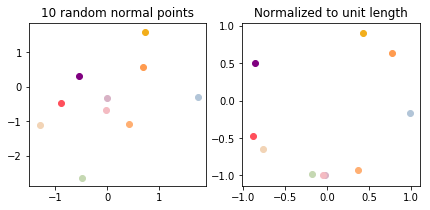

[0 6 4 2 9 8 3 5 7 1] [0 6 4 8 2 9 1 7 5 3] False
[1 7 4 9 5 2 3 0 6 8] [1 9 2 4 7 5 0 3 6 8] False
[2 9 3 4 5 6 7 0 8 1] [2 9 1 4 7 5 0 3 6 8] False
[3 2 5 9 6 7 4 8 0 1] [3 5 7 8 1 6 9 2 4 0] False
[4 9 2 5 0 6 3 7 1 8] [4 2 9 1 0 7 5 6 8 3] False
[5 7 3 9 2 4 6 1 8 0] [5 7 1 3 9 2 4 0 8 6] False
[6 8 2 3 0 9 4 5 7 1] [6 8 0 4 3 2 9 1 5 7] False
[7 5 9 2 3 4 1 6 0 8] [7 5 1 9 2 4 3 0 8 6] False
[8 6 3 2 0 9 5 4 7 1] [8 6 0 3 4 5 7 2 9 1] False
[9 2 4 5 3 7 6 0 1 8] [9 2 1 4 7 5 0 3 6 8] False


('Identical nearest neighbors for original and normalized points?', False)

In [51]:
np.random.seed(11)
S = np.random.normal(size=(10, 2))
S_ = S / l2norm(S)

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(7,3))

for i in range(len(S)):
    ax1.scatter(S[i,0], S[i,1], c=colors[i])

ax1.set_title('%d random normal points' % len(S))

for i in range(len(S_)):
    ax2.scatter(S_[i,0], S_[i,1], c=colors[i])
ax2.set_title('Normalized to unit length')
plt.show()

knn = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean')
knn.fit(S)
nbrs = knn.kneighbors(S, return_distance=False)

knn = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='cosine')
knn.fit(S_)
nbrs_ = knn.kneighbors(S_, return_distance=False)

for n, n_ in zip(nbrs, nbrs_):
    print(n, n_, np.all(n == n_))

'Identical nearest neighbors for original and normalized points?', np.all(nbrs == nbrs_)

## Example: Euclidean distance better than Cosine

Below I load the Iris dataset, where each sample is a 4-dimensional vector. I take the last two dimensions for simpler plotting. 

When I plot the original vectors, it's very easy to separate the classes in Euclidean space.

When I normalize the vectors to unit length, it becomes much more difficult to separate them, even if you consider the angle of two points relative the origin.

Then I fit and test a KNN classifier with euclidean and cosine. Intuitively, the KNN classifier with Euclidean distance has a much better accuracy.

In [97]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data'][:, 2:]
Y = iris['target']
print('2D Iris', X.shape, Y.shape)

2D Iris (150, 2) (150,)


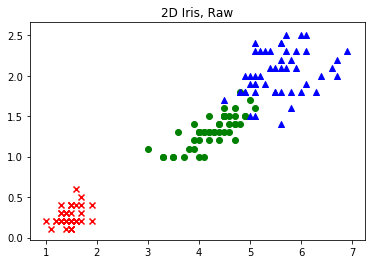

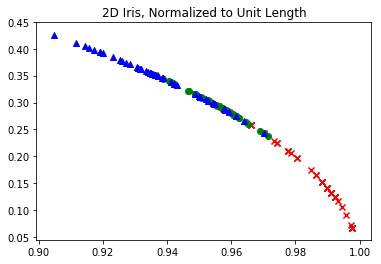

In [95]:
markers = ['x', 'o', '^']

for x, y in zip(X, Y):
    plt.scatter(x[0], x[1], color=colors[y], marker=markers[y])
plt.title('2D Iris, Raw')
plt.show()

X_ = X / l2norm(X)
for x, y in zip(X_, Y):
    plt.scatter(x[0], x[1], color=colors[y], marker=markers[y])
plt.title('2D Iris, Normalized to Unit Length')
plt.show()

In [96]:
knnc = KNeighborsClassifier(algorithm='brute', metric='euclidean')
knnc.fit(X, Y)
print('Euclidean KNN accuracy = %.3lf' % accuracy_score(Y, knnc.predict(X)))

knnc = KNeighborsClassifier(algorithm='brute', metric='cosine')
knnc.fit(X, Y)
print('Cosine KNN accuracy = %.3lf' % accuracy_score(Y, knnc.predict(X)))

Euclidean KNN accuracy = 0.960
Cosine KNN accuracy = 0.853


## Example: Cosine distance better than Euclidean

Documents can consist of two words, with highly variable lengths. Docs from topic 1 have more of word 1, docs from topic 2 have more of word 2. Plots below should illustrate that the unit-vector representation creates a clearer separation. However this would likely be a more useful separation as the number of words increases.

The idea is that the relative proportions of words matter more than their quantities, as explained [here](https://cmry.github.io/notes/euclidean-v-cosine). For example, consider the term vectors from three articles:

1. 200 words about a recent tennis match.
2. 200 words about George Washington.
3. 5000 words about Roger Federer, the tennis player.

(1) and (3) will use many of the same words, but (3) is much longer than (1). (1) and (2) might not use many of the same words, but their term vectors will have similar magnitude. Using Euclidean distance, the difference in magnitudes might mean that (1) and (2) are more similar than (1) and (3). Because Cosine distance normalizes the vectors to unit length, (1) and (3) will likely be more similar than (1) and (2).

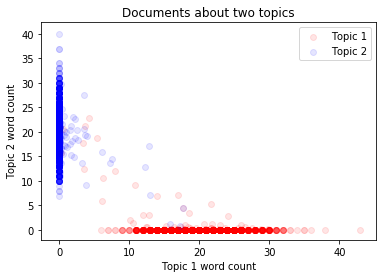

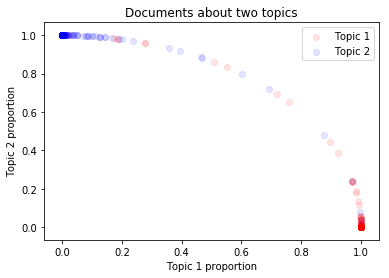

In [179]:
N = 2000
X1 = np.random.dirichlet([1-.005, .005], size=N) * np.repeat(np.random.poisson(20, size=(N,1)), 2, axis=1)
X2 = np.random.dirichlet([.005, 1-.005], size=N) * np.repeat(np.random.poisson(20, size=(N,1)), 2, axis=1)
X = np.vstack([X1, X2])
Y = np.hstack([np.zeros(N), np.ones(N)])

plt.scatter(X1[:,0], X1[:,1], color='red', label='Topic 1', alpha=0.1)
plt.scatter(X2[:,0], X2[:,1], color='blue', label='Topic 2', alpha=0.1)
plt.title('Documents about two topics')
plt.xlabel('Topic 1 word count')
plt.ylabel('Topic 2 word count')
plt.legend()
plt.show()

X1_ = X1 / l2norm(X1)
X2_ = X2 / l2norm(X2)
plt.scatter(X1_[:,0], X1_[:,1], color='red', label='Topic 1', alpha=0.1)
plt.scatter(X2_[:,0], X2_[:,1], color='blue', label='Topic 2', alpha=0.1)
plt.title('Documents about two topics')
plt.xlabel('Topic 1 proportion')
plt.ylabel('Topic 2 proportion')
plt.legend()
plt.show()

In [180]:
knnc = KNeighborsClassifier(algorithm='brute', metric='euclidean')
knnc.fit(X, Y)
print('Euclidean KNN accuracy = %.6lf' % accuracy_score(Y, knnc.predict(X)))

knnc = KNeighborsClassifier(algorithm='brute', metric='cosine')
knnc.fit(X, Y)
print('Cosine KNN accuracy = %.6lf' % accuracy_score(Y, knnc.predict(X)))

Euclidean KNN accuracy = 0.997000
Cosine KNN accuracy = 0.996250
